In [21]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [22]:
# 2. Import the dataset (same directory - py)
#df = pd.read_csv('cancer.csv') #excel.xls xlrd:

df = pd.read_excel('excel.xlsx', engine='openpyxl')

In [23]:
# 3. Exploratory data analysis: Data Information
print(df.head())
print(df.shape)
print(df.info())

       년도    회차         추첨일  당첨자수            당첨금액  당첨자수.1       당첨금액.1  \
0  2023.0  1093  2023.11.11    13  1,967,040,750원      65  65,568,025원   
1     NaN  1092  2023.11.04    16  1,583,289,844원      84  50,263,170원   
2     NaN  1091  2023.10.28     9  2,898,470,459원      65  66,887,780원   
3     NaN  1090  2023.10.21    11  2,386,494,614원      88  49,718,638원   
4     NaN  1089  2023.10.14     9  2,978,522,167원      79  56,554,219원   

   당첨자수.2      당첨금액.2  당첨자수.3   당첨금액.3   당첨자수.4  당첨금액.4   1   2   3   4   5  \
0    2928  1,455,575원  141232  50,000원  2327509  5,000원  10  17  22  30  35   
1    3327  1,269,044원  160096  50,000원  2540721  5,000원   7  18  19  26  33   
2    2873  1,513,299원  149578  50,000원  2481449  5,000원   6  20  23  24  28   
3    2931  1,492,747원  143714  50,000원  2398962  5,000원  12  19  21  29  40   
4    2825  1,581,517원  138575  50,000원  2338390  5,000원   4  18  31  37  42   

    6  보너스  
0  43   44  
1  45   37  
2  30   44  
3  45    1  
4  43   40  
(1

In [24]:
# 2-1. object delete 
df = df.drop(columns=['Bare_Nuclei'])
# 3. Exploratory data analysis: Class Inbalance
print(df['Class'].value_counts())
print()
print(df['Mitoses'].value_counts())
print()
print(df['Bland_Chromatin'].value_counts())
print()
print(df['Class'].value_counts()/np.float64(len(df)))

KeyError: "['Bare_Nuclei'] not found in axis"

In [ ]:
# 3. Exploratory data analysis: Check Missing Data
print(df.isnull().sum())

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


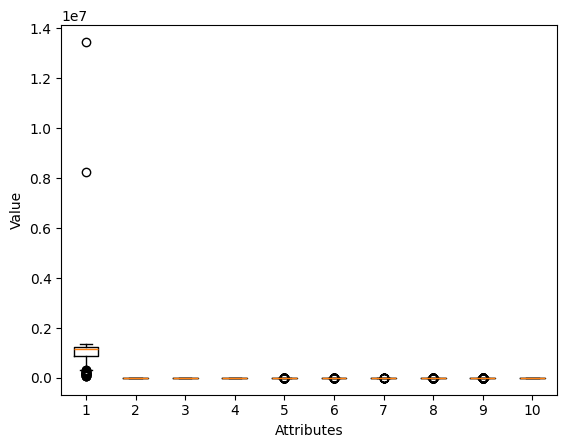

In [ ]:
# 3. Exploratory data analysis: Check Outliers
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

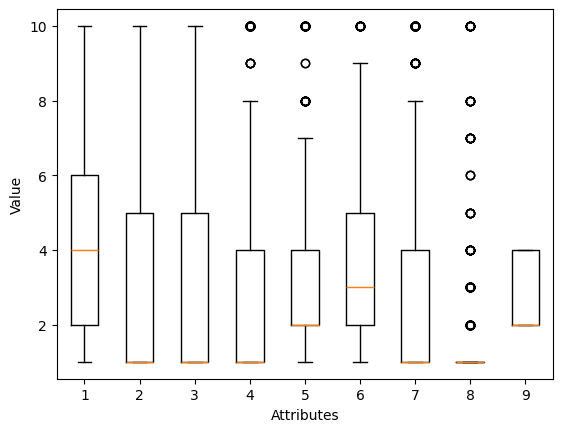

In [ ]:
# 3-1. Exploratory data analysis: Outliers Detail
data_to_boxplot = df.drop(columns=['Id'])
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()
df = df.drop(columns=['Id'])

In [ ]:
# 4. Split data into separate training and test set 7:3
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
15                 7                     4                      6   
665                1                     1                      1   
348                3                     4                      4   
429                2                     1                      1   
282                1                     4                      3   
..               ...                   ...                    ...   
599                5                     2                      4   
360                6                    10                     10   
439                5                     1                      1   
174                8                     6                      5   
122               10                    10                     10   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bland_Chromatin  \
15                   4                            6                4   
665                  1     

In [ ]:
# 5. Fit K Neighbours Classifier to the training set 5
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]


In [ ]:
# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[136   2]
 [  9  63]]
0.9476190476190476


In [ ]:
# 7. Rebuild kNN Classification model using different values of k triple
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
[[136   2]
 [  9  63]]
0.9476190476190476


In [ ]:
# 7. Rebuild kNN Classification model using different values of k double
classifier = KNeighborsClassifier(n_neighbors = 30)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[4 2 2 4 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2
 4 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 4 2
 2 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 4 4 2 2 2 2 4 2 2
 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 4 2 4 2 2 2 2 4 2 4 4 4 2 4 2 2 4 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
[[136   2]
 [  9  63]]
0.9476190476190476


[0.9333333333333333, 0.9047619047619048, 0.9428571428571428, 0.9285714285714286, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9428571428571428, 0.9476190476190476, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428,

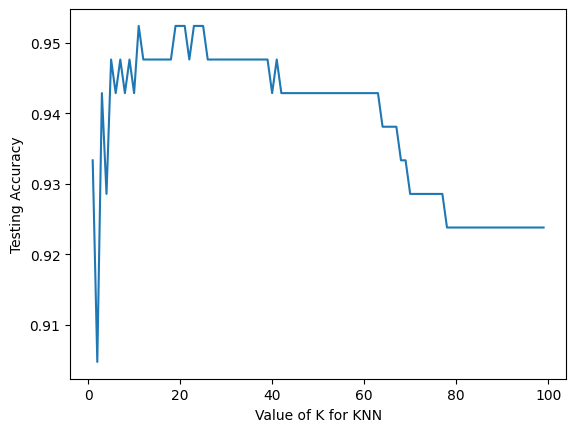

In [ ]:
# 7. Improving Accuracy: Tuning k parameter 1 to 100
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [ ]:
# 8. Improving Accuracy: Changing split ratio 8:2 (prev 7:3)
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(559, 8)
(559,)
(140, 8)
(140,)


[0.9285714285714286, 0.8928571428571429, 0.9357142857142857, 0.9357142857142857, 0.95, 0.9357142857142857, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9285714285714286, 0.95, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.93571

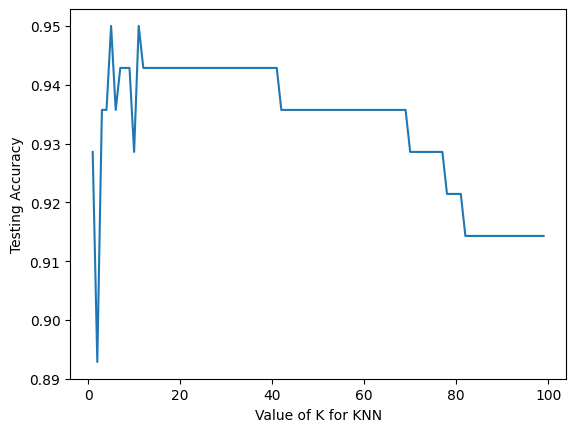

In [ ]:
# 8. Improving Accuracy: Changing split ratio (8:2)
# Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

<Axes: >

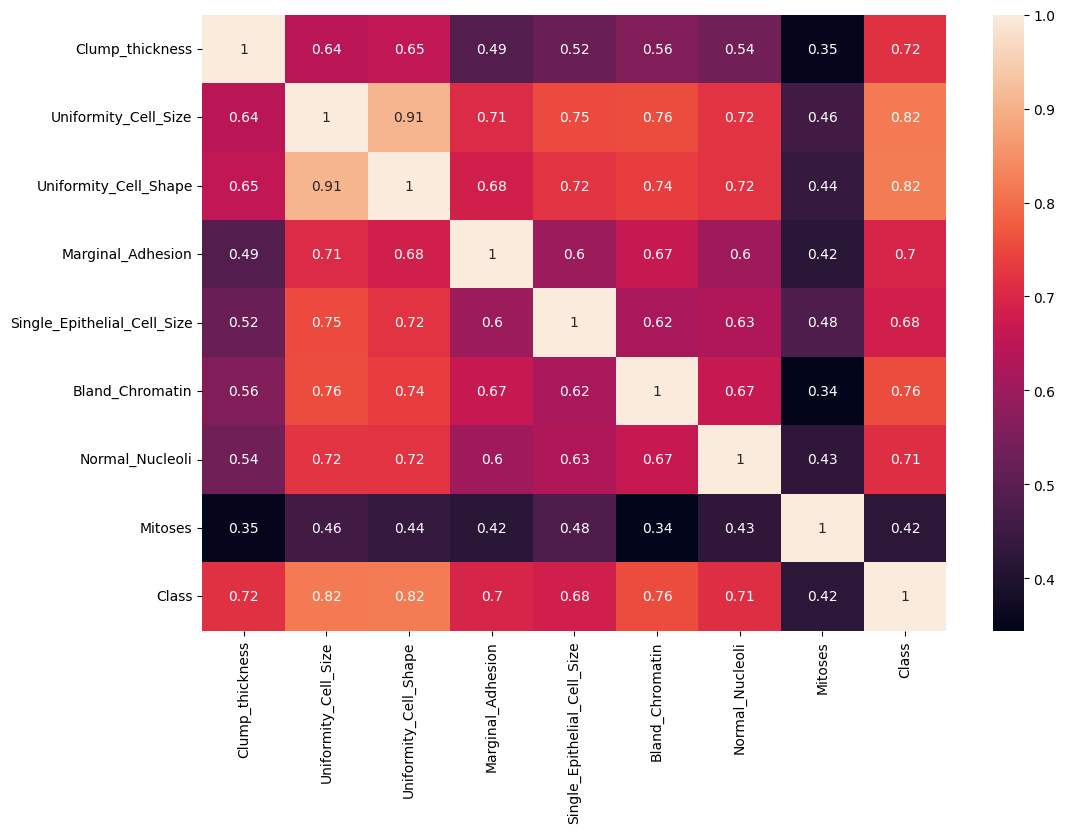

In [ ]:
# 9. Improving Accuracy: Feature Engineering
dfcorr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data = dfcorr, annot=True)

In [ ]:
# 10. Improving Accuracy: Feature Engineering ( low 2 columns 0.68, 0.42 )
df = df.drop(columns=['Single_Epithelial_Cell_Size','Mitoses'])

In [ ]:
# 11. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(489, 6)
(489,)
(210, 6)
(210,)


[0.9333333333333333, 0.9047619047619048, 0.9571428571428572, 0.9428571428571428, 0.9571428571428572, 0.9476190476190476, 0.9571428571428572, 0.9428571428571428, 0.9523809523809523, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476,

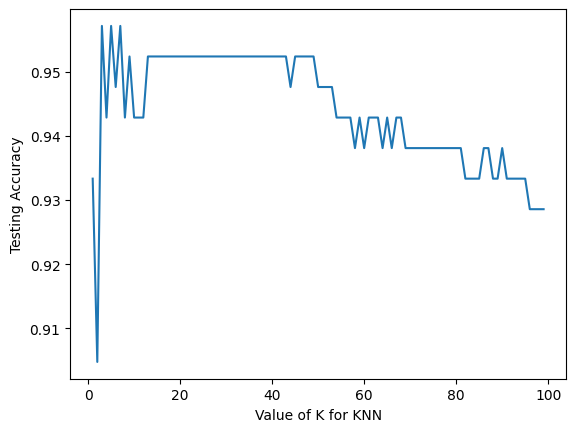

In [ ]:
# 11. Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [ ]:
# 12. Improving Accuracy: Feature Scaling
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Bland_Chromatin,Normal_Nucleoli,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.437768,2.866953,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.438364,3.053634,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


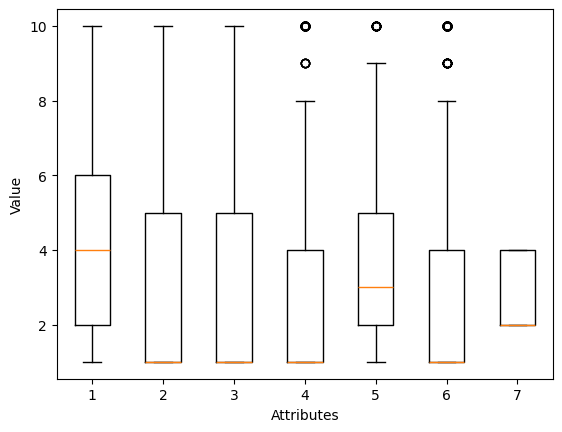

In [ ]:
plt.boxplot(df)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [ ]:
# 12. Improving Accuracy: Feature Scaling
from sklearn.preprocessing import RobustScaler

#Create copy of dataset.
df = df.copy()

scaler = RobustScaler()


features = [['Marginal_Adhesion', 'Normal_Nucleoli']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])



In [ ]:
# 13. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(489, 6)
(489,)
(210, 6)
(210,)


[0.9428571428571428, 0.9047619047619048, 0.9714285714285714, 0.9666666666666667, 0.9714285714285714, 0.9619047619047619, 0.9666666666666667, 0.9571428571428572, 0.9619047619047619, 0.9523809523809523, 0.9571428571428572, 0.9523809523809523, 0.9666666666666667, 0.9523809523809523, 0.9571428571428572, 0.9476190476190476, 0.9571428571428572, 0.9476190476190476, 0.9523809523809523, 0.9523809523809523, 0.9571428571428572, 0.9523809523809523, 0.9571428571428572, 0.9523809523809523, 0.9619047619047619, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476, 0.9476190476190476,

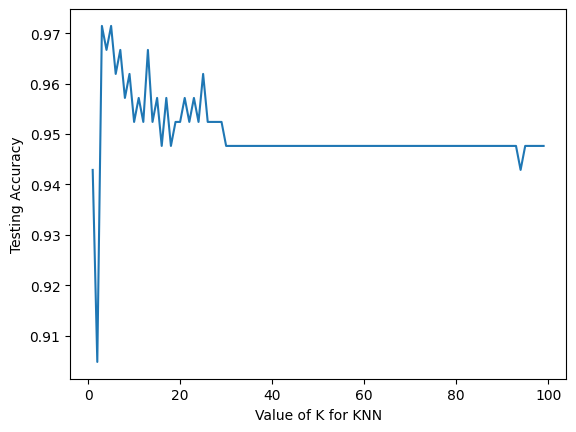

In [ ]:
# 14. Tuning k parameter 
k_range = range(1, 100)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()